# Visualise latent space

The aim of this notebook is to replicate a figure from the lecture notes of _Cambridge Engineering-Deep Learning for Computer Vision_. The task is binary classification with a 3 node hidden layer. This hidden layer is visualised in 3D space, which showed that the action of learning _pushed_ the weights into corners of the cube.

In [15]:
# Setup logging
import logging

# Relative import hack
import os, sys
sys.path.insert(1, os.path.realpath(os.path.pardir))

from digit_classifier import base, DigitClassifier, DEVICE, Metrics, DigitClassifierConfig
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.animation as ani
import seaborn as sns
import numpy as np
from pathlib import Path
import pickle
sns.set_theme()

In [16]:
model_dir = Path("../../resources/model/chap1/visualise_latent_space/")
metrics_dir = model_dir / 'metrics.pkl'

In [17]:
# Load data from numpy array
ll = np.load(model_dir / "latent_label-20.npy")
ll.shape

(20, 50000, 4)

In [30]:
lbls = ll[:,:,-1]
print(lbls.shape)
lbls[0] == lbls[1]

(20, 50000)


array([False, False, False, ...,  True, False, False])

## Visualise the latent space and class labels

In [20]:
epoch = 5
latents = ll[epoch,:,0:3]
print(latents.shape)
labels = ll[epoch,:,-1]
print(labels.shape)

# Only consider labels for 0, 1
# labels = (0, 1)
idxs = np.where((labels == 0) | (labels == 1))
print(f"Number of samples: {len(idxs[0])}")
labels = labels[idxs]
print(labels.shape)
latents = latents[idxs]
print(latents.shape)

(50000, 3)
(50000,)
Number of samples: 10516
(10516,)
(10516, 3)


([<matplotlib.lines.Line2D object at 0x00000207F6B46670>, <matplotlib.lines.Line2D object at 0x00000207F6B46B80>], ['$\\mathdefault{0}$', '$\\mathdefault{1}$'])


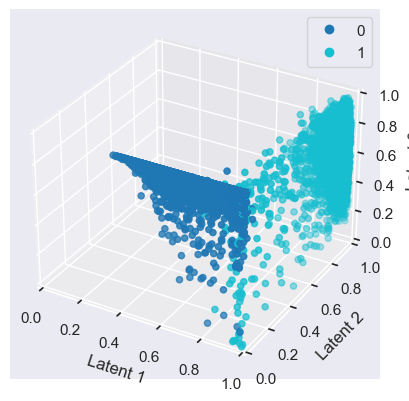

In [21]:
# Plot the latent space
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

g = ax.scatter(latents[:,0], latents[:,1], latents[:,2], c=labels, cmap='tab10')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)
ax.set_xlabel('Latent 1')
ax.set_ylabel('Latent 2')
ax.set_zlabel('Latent 3')
print(g.legend_elements())
plt.legend(*g.legend_elements())
plt.show()

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


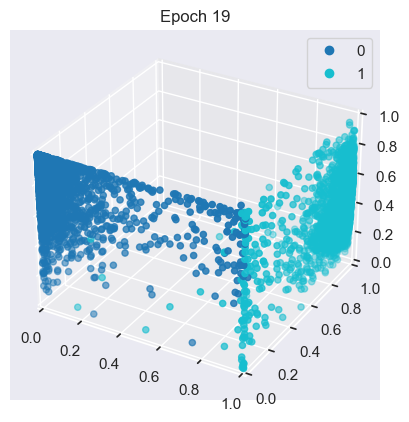

In [24]:
# Animate the latent space
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
g = ax.scatter(latents[:,0], latents[:,1], latents[:,2], c=labels, cmap='tab10')

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

plt.legend(*g.legend_elements())

def next_ani(i):
  ax.set_title(f"Epoch {i}")
  latents = ll[i,:,0:3]
  labels = ll[i,:,-1]
  idxs = np.where((labels == 0) | (labels == 1))
  labels = labels[idxs]
  latents = latents[idxs]
  g._offsets3d = (latents[:,0], latents[:,1], latents[:,2])
  g.set_array(labels)
  return g,

anim = ani.FuncAnimation(fig, next_ani, frames=range(ll.shape[0]), interval=1000, blit=True)
anim.save('latent_space.gif')